In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import pandas as pd
 df_train = pd.read_csv("/content/train.csv", delimiter='\t')
 df_train

,score,sentence1,sentence2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...
5706,0.00,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5707,0.00,Dozens of Egyptians hostages taken by Libyan t...,Egyptian boat crash death toll rises as more b...
5708,0.00,President heading to Bahrain,President Xi: China to continue help to fight ...
5709,0.00,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


In [ ]:
df_train.describe()

,score
count,5711.000000
mean,2.698543
std,1.466207
min,0.000000
25%,1.500000
50%,3.000000
75%,3.800000
max,5.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5711 entries, 0 to 5710
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      5711 non-null   float64
 1   sentence1  5711 non-null   object 
 2   sentence2  5708 non-null   object 
dtypes: float64(1), object(2)
memory usage: 134.0+ KB


In [ ]:
 import pandas as pd
 df_test = pd.read_csv("/content/dev.csv", delimiter='\t')
 df_test

,score,setence1,sentence2
0,5.00,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.
1,4.75,A young child is riding a horse.,A child is riding a horse.
2,5.00,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.
3,2.40,A woman is playing the guitar.,A man is playing guitar.
4,2.75,A woman is playing the flute.,A man is playing a flute.
...,...,...,...
1465,2.00,Scientists prove there is water on Mars,Has Nasa discovered water on Mars?
1466,0.00,Pranab stresses need to strive for peace by na...,WTO: India regrets action of developed nations
1467,2.00,Volkswagen skids into red in wake of pollution...,"Volkswagen's ""gesture of goodwill"" to diesel o..."
1468,0.00,Obama is right: Africa deserves better leadership,Obama waiting for midterm to name attorney gen...


In [ ]:
df_test.describe()


,score
count,1470.000000
mean,2.344035
std,1.502124
min,0.000000
25%,1.000000
50%,2.400000
75%,3.600000
max,5.000000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      1470 non-null   float64
 1   setence1   1470 non-null   object 
 2   sentence2  1468 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.6+ KB


In [ ]:
df_test.columns

Index(['score', 'setence1', 'sentence2'], dtype='object')

In [ ]:
df_test.columns = ['score', 'sentence1', 'sentence2']
df_test.to_csv('dev.csv', sep="\t",index=False)

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer

class CustomDataset(Dataset):
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path, delimiter='\t')
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        # self.sent1_max = 0
        # self.sent2_max = 0
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        sentence1 = ( sample["sentence1"] if type(sample["sentence1"]) !=float  else "" )
        sentence2 = ( sample["sentence2"] if type(sample["sentence2"]) !=float  else "" )
        score = sample['score']
        # self.sent1_max = max(self.sent1_max,len(sentence1.split()))
        # self.sent2_max = max(self.sent2_max,len(sentence2.split()))
        max_score = 5.0
        return sentence1,sentence2, float(score/max_score)


# Example usage:

file_path = "/content/train.csv"
train_custom_dataset = CustomDataset(file_path)

file_path = "/content/dev.csv"
dev_custom_dataset = CustomDataset(file_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, losses
import importlib
from torch.utils.data import DataLoader
from sentence_transformers import evaluation



In [ ]:


train_examples = []
for sent1,sent2,score in train_custom_dataset:
    train_examples.append(InputExample(texts=[sent1,sent2], label=score))

sentences1 = [ ]
sentences2 = [ ]
scores = [ ]
for sent1,sent2,score in dev_custom_dataset:
  sentences1.append(sent1)
  sentences2.append(sent2)
  scores.append(score)



train_batch_size = 1
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=train_batch_size)




In [ ]:
import inspect
import os

package_name = SentenceTransformer  # Replace with the actual package name
package_path = os.path.dirname(inspect.getfile(package_name))
print(package_path)

/usr/local/lib/python3.10/dist-packages/sentence_transformers


In [ ]:

evaluator = evaluation.EmbeddingSimilarityEvaluator(sentences1, sentences2, scores)

model = SentenceTransformer('all-MiniLM-L6-v2') #
train_loss = losses.CosineSimilarityLoss(model=model)

model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=10,
    warmup_steps=100,
    evaluator=evaluator,
    evaluation_steps=5711,
)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

Iteration:   0%|          | 0/5711 [00:00<?, ?it/s]

In [ ]:
import numpy as np
np.array(model.traning_loss)

array([0.02377916, 0.0124684 , 0.00792839, 0.00589028, 0.0045997 ,
       0.00367349, 0.00306593, 0.00251684, 0.00211135, 0.00188294])

In [ ]:
import numpy as np
np.unique(model.validation_loss)

array([0.88473273, 0.88509165, 0.88517062, 0.88519507, 0.88692038,
       0.8872648 , 0.88766058, 0.8888967 , 0.88897401, 0.88907929])

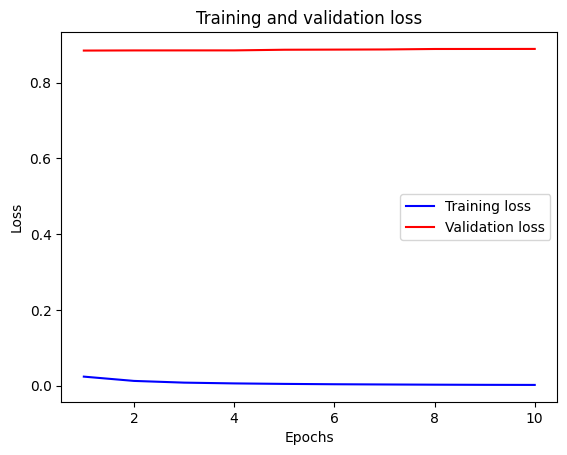

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace these with your actual data)
train_loss = np.array(model.traning_loss)
val_loss = np.unique(model.validation_loss)
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/NLP_A3/mini-gun-1/training_loss.pkl', 'wb') as f:
    pickle.dump(np.array(model.traning_loss), f)

# Dump validation loss
with open('/content/drive/MyDrive/NLP_A3/mini-gun-1/validation_loss.pkl', 'wb') as f:
    pickle.dump(np.unique(model.validation_loss), f)

In [ ]:
model.save('/content/drive/MyDrive/NLP_A3/mini-gun-1/mini_model')

In [ ]:
model = SentenceTransformer('/content/drive/MyDrive/NLP_A3/mini-gun-1/mini_model')

In [ ]:
# import pickle
# filename = '/content/drive/MyDrive/A3_NLP/model-10-custom.pth'
# with open(filename, 'wb') as outp:  # Overwrites any existing file.
#         pickle.dump(model, outp)

In [ ]:
# import pickle

# filename = '/content/drive/MyDrive/A3_NLP/model-10-custom.pth'

# # Load the pickled file
# with open(filename, 'rb') as inp:
#     model = pickle.load(inp,map_location=torch.device('cpu'))


In [ ]:
a = model.encode(sentences1)
b = model.encode(sentences2)

In [ ]:
import numpy as np

# Assuming A and B are numpy arrays
A = a
B = b
# Compute cosine similarity
dot_product = np.sum(A * B, axis=1)
norm_A = np.linalg.norm(A, axis=1)
norm_B = np.linalg.norm(B, axis=1)
cosine_similarities = dot_product / (norm_A * norm_B)

print("Cosine Similarities:")
print(cosine_similarities)


Cosine Similarities:
[0.9939161  0.9874432  0.9979078  ... 0.46568868 0.2739246  0.2623064 ]


In [ ]:
def scale_cosine_similarity(cosine_similarity):
    scaled_similarity = (cosine_similarity + 1) / 2 * 5
    return scaled_similarity
new_scale_score =scale_cosine_similarity(cosine_similarities)

In [ ]:
from scipy.stats import pearsonr

# Assuming a and b are lists of scalar values

# Compute Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(new_scale_score,scores)

print("Pearson Correlation Coefficient for Validation:", correlation_coefficient)


Pearson Correlation Coefficient for Validation: 0.8875366343583356


# Inference

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 997.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, losses
import importlib
from torch.utils.data import DataLoader
from sentence_transformers import evaluation
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer
import numpy as np

In [ ]:
from sentence_transformers import SentenceTransformer, InputExample, losses
import importlib
from torch.utils.data import DataLoader
from sentence_transformers import evaluation
import torch
from torch.utils.data import Dataset
from transformers import BertTokenizer
import numpy as np
import pandas as pd

test_data = pd.read_csv("/content/sample_test.csv", delimiter='\t')

test_data.columns = ['id', 'sentence1', 'sentence2']
test_data.to_csv('sample_test.csv', sep="\t",index=False)


class CustomDatasett(Dataset):
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path, delimiter='\t')
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        # self.sent1_max = 0
        # self.sent2_max = 0
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data.iloc[idx]
        sentence1 = ( sample["sentence1"] if type(sample["sentence1"]) !=float  else "" )
        sentence2 = ( sample["sentence2"] if type(sample["sentence2"]) !=float  else "" )
        # score = sample['score']
        # self.sent1_max = max(self.sent1_max,len(sentence1.split()))
        # self.sent2_max = max(self.sent2_max,len(sentence2.split()))
        # max_score = 5.0
        return sentence1,sentence2#, float(score/max_score)
file_path = "/content/sample_test.csv"
test_custom_dataset = CustomDatasett(file_path)

tsentences1 = [ ]
tsentences2 = [ ]
for sent1,sent2 in test_custom_dataset:
  tsentences1.append(sent1)
  tsentences2.append(sent2)

# Initialize the CrossEncoder model
tmodel = SentenceTransformer('/content/drive/MyDrive/NLP_A3/mini-gun-1/mini_model')

a = model.encode(tsentences1)
b = model.encode(tsentences2)


# Assuming A and B are numpy arrays
A = a
B = b
# Compute cosine similarity
dot_product = np.sum(A * B, axis=1)
norm_A = np.linalg.norm(A, axis=1)
norm_B = np.linalg.norm(B, axis=1)
cosine_similarities = dot_product / (norm_A * norm_B)

def scale_cosine_similarity(cosine_similarity):
    scaled_similarity = (cosine_similarity + 1) / 2 * 5
    return scaled_similarity
new_scale_score =scale_cosine_similarity(cosine_similarities)

print("Scale_score Cosine Similarities:")
print(new_scale_score)


# Predict whether the two sentences belong to the same category or not


In [ ]:
test_data['score'] = new_scale_score
test_data = test_data[['id', 'score', 'sentence1', 'sentence2']]

test_data.to_csv('/content/sample_test_out.csv', sep="\t",index=False)


# test_data = pd.read_csv("/content/sample_test.csv", delimiter='\t')

# PART B

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
a = model.encode(sentences1)
b = model.encode(sentences2)
import numpy as np

# Assuming A and B are numpy arrays
A = a
B = b

# Compute cosine similarity
dot_product = np.sum(A * B, axis=1)
norm_A = np.linalg.norm(A, axis=1)
norm_B = np.linalg.norm(B, axis=1)
cosine_similarities = dot_product / (norm_A * norm_B)

print("Cosine Similarities:")
print(cosine_similarities)

def scale_cosine_similarity(cosine_similarity):
    scaled_similarity =( (cosine_similarity + 1) / 2)* 5
    return scaled_similarity
new_scale_score =scale_cosine_similarity(cosine_similarities)
from scipy.stats import pearsonr

# Assuming a and b are lists of scalar values

# Compute Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(new_scale_score,scores)

print("Pearson Correlation Coefficient for Validation:", correlation_coefficient)


Cosine Similarities:
[0.99337167 0.95396227 0.9801015  ... 0.43816915 0.30274552 0.30168116]
Pearson Correlation Coefficient for Validation: 0.8603265863680176
